### Exercise 1: Naïve Bayes Model
#### Question 1. Load the Iris dataset. Split it into a training (80%) and dataset (20%)
#### Question 2. Use Gaussian Bayes model.
#### Question 3. Provide the classification report.
#### Question 4. Compute the cross-validation score. Select the appropriate number of folds. What does the cross-validation outputs tell us?
#### Question 5. Provide the mean accuracy of each fold. Hint: Accuracy is measured with cross_val_score. What can you say about the model?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#### Answer to Q1. Loaded the Iris dataset and checking the dataset

In [2]:
iris=datasets.load_iris()

In [3]:
X=iris.data
Y=iris.target

In [4]:
X.shape

(150, 4)

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_df=pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris_df.shape

(150, 5)

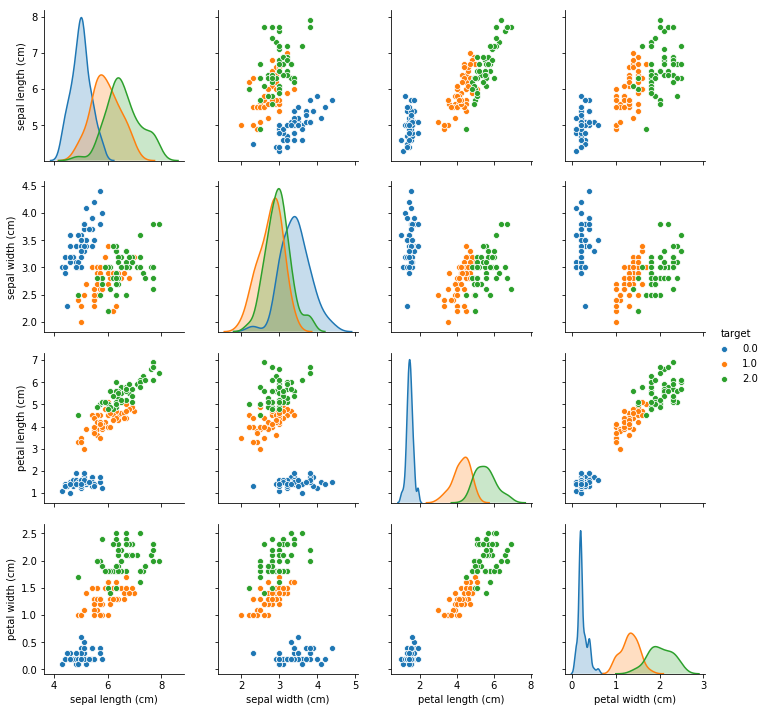

In [9]:
sns.pairplot(iris_df, hue = 'target',vars = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] )

#### Answer to Q1. Split the data into training (80%) and dataset (20%)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size = 0.8) 
#https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

#### Answer to Q2: Used a Gaussian Bayes model.

In [11]:
model=GaussianNB()

In [12]:
model.fit(X_train, Y_train)
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
predictions=model.predict(X_test)

In [14]:
expected=Y_test

In [15]:
#Check accuracy
print("Accuracy of our model: %.2f" % metrics.accuracy_score(expected,predictions))

Accuracy of our model: 0.97


#### Answer to Q3: Below is the classification report

In [16]:
print(classification_report(expected,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Answer to Q4: Below is the cross validation score.

In [17]:
accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(accuracy)
#https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


#### Answer to Q5: Below is the mean accuracy of 10  fold.

In [18]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is: %.2f" % (accuracy.mean() * 100))

Accuracy of Model with Cross Validation is: 95.33


In [19]:
#get the standard deviation of each fold 
print(accuracy.std())

0.04268749491621898
